In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

df = pd.read_csv('./data/eg_midsem.csv',on_bad_lines='skip')

df.rename(columns={'Total(70)':'Marks'}, inplace=True)
df.rename(columns={'ID NO':'ID No'}, inplace=True)
df.dropna(subset=['Marks'], inplace=True)
df['code'] = df['ID No'].str[4:6]

df['rank'] = df['ID No'].str[-5:-1].astype(int)

df

,ID No,Ortho total (25),Ortho comments,Lines(25),Lines comments,Planes total(20),Planes comments,Marks,code,rank
0,2022A8PS1240P,17.5,missing hidden lines,0,Not Attempt,6,"Incomplete Part 1, Did not do Part 2 and3,Inco...",23.5,A8,1240
1,2022A3PS0412P,13.0,Missing hidden,16,Many Mistakes,12,"Did not take circle into consideration, Wrong\...",41.0,A3,412
2,2022A4PS0831P,22.5,Missing hidden and center lines,21,Dimensions and labelings are missing,6,worng orien. incomplete 2nd stage,49.5,A4,831
3,2022A7PS0012P,16.0,"Missing hidden lines, extra lines, not drawn\r...",4,"Wrong solution, procedure, and dimensions",2,1st part 1st stage drawn with wrong orien.,22.0,A7,12
4,2022A1PS1572P,22.0,"Missing hidden lines, dimension of cirle is\r...",21,Dimensions are missing and wrong unit\r\nused,5,wrong quad wrong orien. last stage\r\nincomplete,48.0,A1,1572
...,...,...,...,...,...,...,...,...,...,...
550,2022A3PS0492P,16.5,Missing hidden and extra visible,25,NaN,18,"No labelling, No dimensioning, but Correct\r\n...",59.5,A3,492
551,2022A4PS0543P,19.0,missing hidden lines,24,True length dimensioning not done,9.5,"Circle diameter wrong, Incomplete Part 2,\r\nD...",52.5,A4,543
552,2022A4PS0617P,13.0,"Missing hidden, cenetr lines, wrong\r\ndimensi...",0,No drawing available,16,incorrect 3rd stage no dim,29.0,A4,617
553,2022A4PS0868P,16.0,"Missing hidden and center lines, extra lines,\...",18,"Dimensions are missing,values are wrong",14,incomplete 2nd and 3rd stages,48.0,A4,868


In [3]:
max_marks = 75

Text(0.5, 1.0, 'Marks Distribution for EG Midsem')

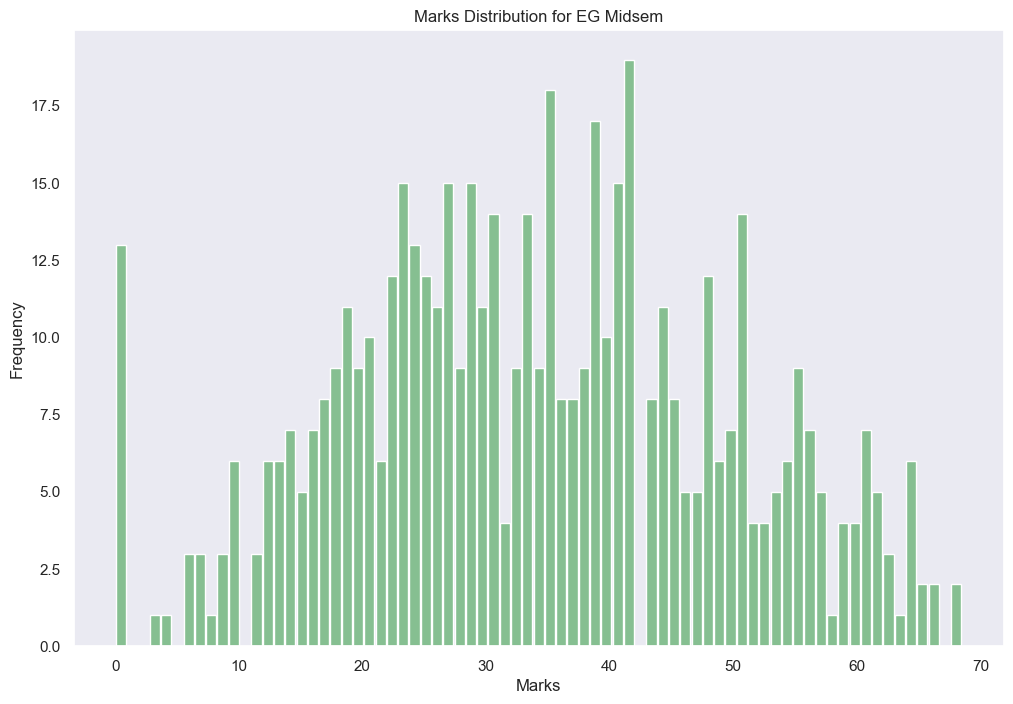

In [4]:
import seaborn as sns
sns.set_theme()

df.hist(column='Marks',bins=max_marks, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.title('Marks Distribution for EG Midsem')

<Axes: xlabel='rank', ylabel='Marks'>

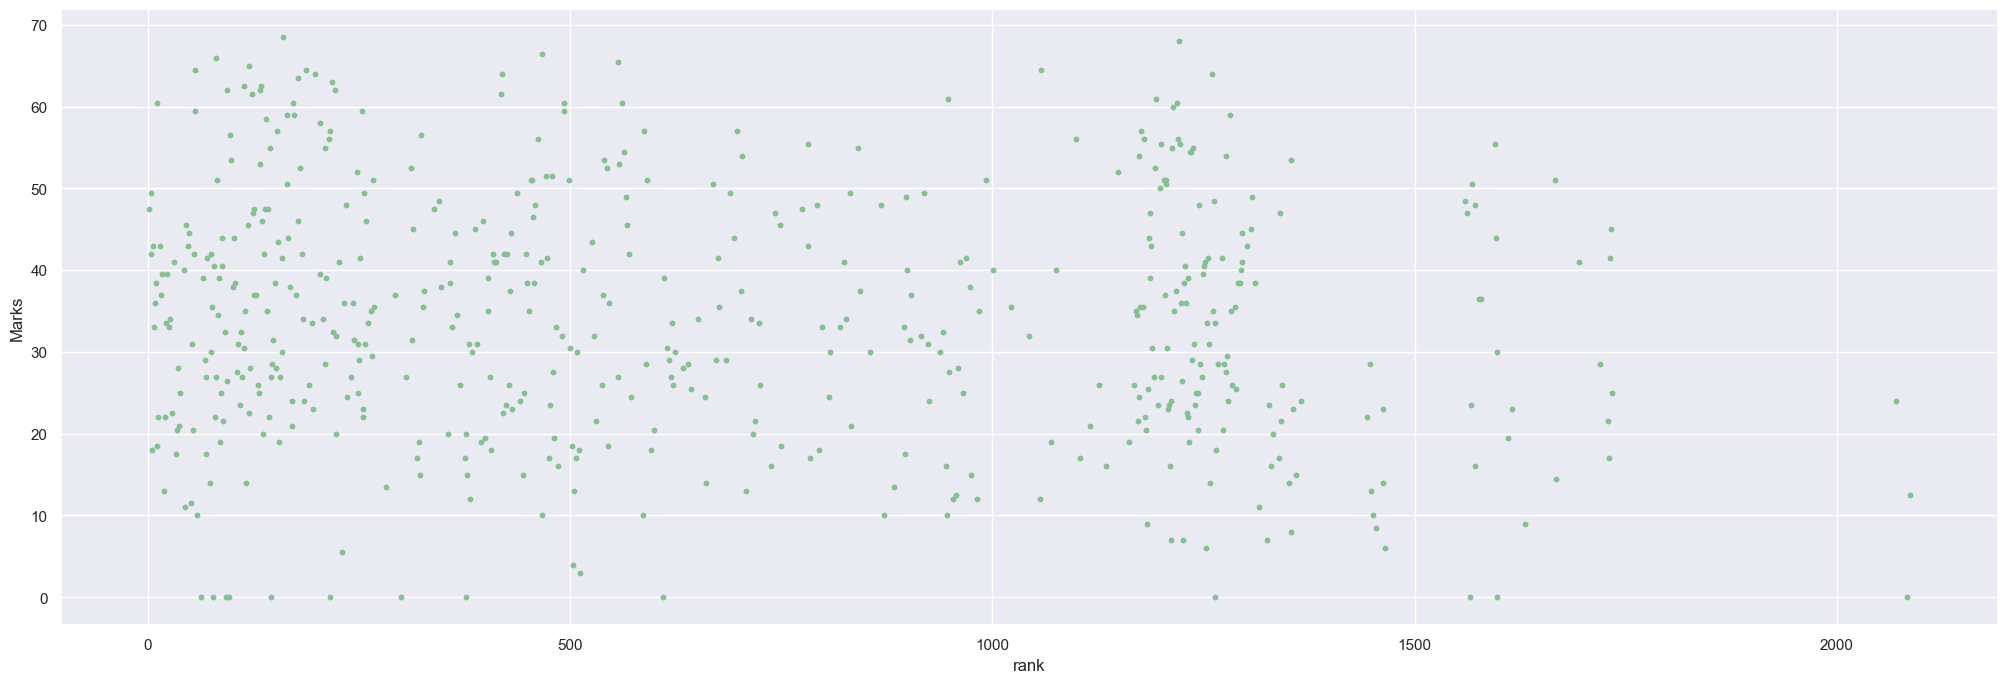

In [5]:
# plot rank vs marks
df.plot.scatter(x='rank', y='Marks', figsize=(25,8), color='#86bf91', zorder=2, s=10)

<Axes: xlabel='rank'>

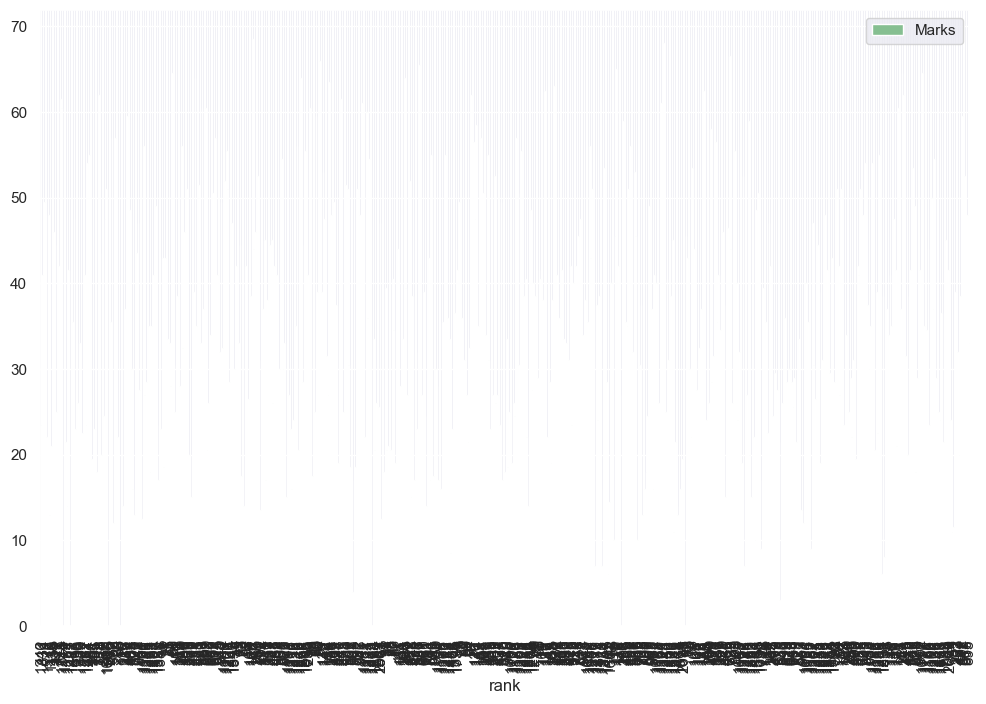

In [6]:
# plot rank vs. marks bar graph
df.plot.bar(x='rank', y='Marks', figsize=(12,8), color='#86bf91', zorder=2)

In [7]:
print(f"Mean: {df['Marks'].mean()}")
print(f"Median: {df['Marks'].median()}")

Mean: 33.96003717472119
Median: 33.5


In [8]:
for i in range(60, 150):
    print(f"marks: {i/2} -> {stats.percentileofscore(df['Marks'], i/2, kind='weak')}")

marks: 30.0 -> 42.93680297397769
marks: 30.5 -> 43.86617100371747
marks: 31.0 -> 45.53903345724907
marks: 31.5 -> 46.28252788104089
marks: 32.0 -> 47.21189591078067
marks: 32.5 -> 47.955390334572485
marks: 33.0 -> 49.25650557620818
marks: 33.5 -> 50.55762081784386
marks: 34.0 -> 51.67286245353159
marks: 34.5 -> 52.23048327137546
marks: 35.0 -> 54.089219330855016
marks: 35.5 -> 55.576208178438655
marks: 36.0 -> 56.69144981412639
marks: 36.5 -> 57.0631970260223
marks: 37.0 -> 58.55018587360595
marks: 37.5 -> 59.47955390334572
marks: 38.0 -> 60.22304832713754
marks: 38.5 -> 62.081784386617095
marks: 39.0 -> 63.38289962825279
marks: 39.5 -> 64.1263940520446
marks: 40.0 -> 65.24163568773234
marks: 40.5 -> 65.98513011152416
marks: 41.0 -> 68.02973977695167
marks: 41.5 -> 69.70260223048327
marks: 42.0 -> 71.56133828996282
marks: 42.5 -> 71.56133828996282
marks: 43.0 -> 72.67657992565056
marks: 43.5 -> 73.04832713754647
marks: 44.0 -> 74.16356877323419
marks: 44.5 -> 75.09293680297397
marks: 4

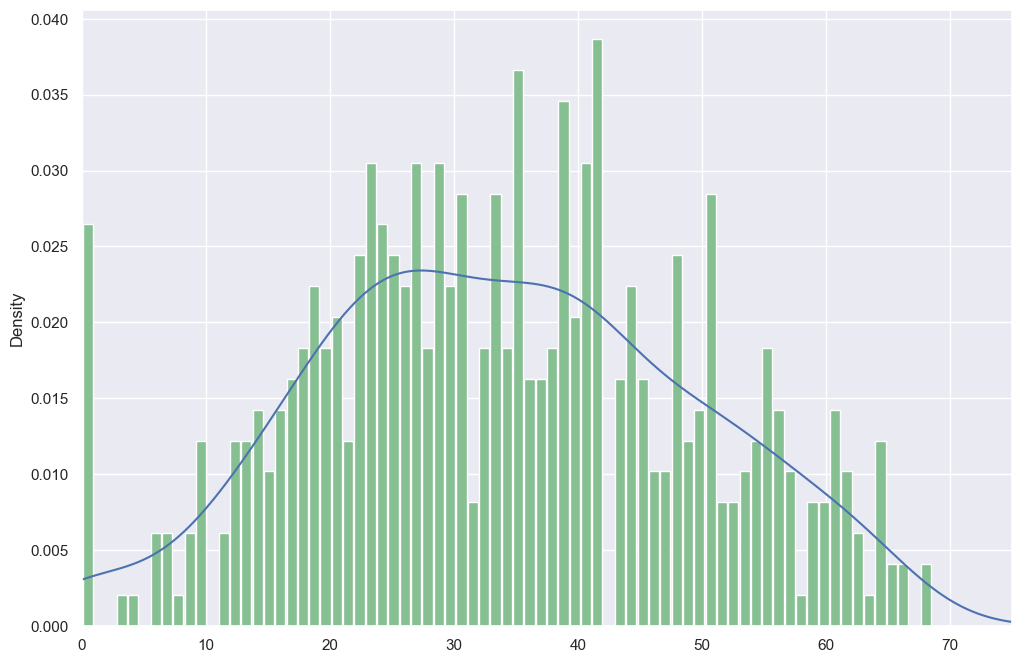

In [9]:
fig, ax = plt.subplots(figsize = (6,4))
df['Marks'].plot(kind = "hist", density=True, bins=max_marks, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
df['Marks'].plot(kind = "kde", ax=ax)
ax.set_xlim(0, max_marks)
plt.show()

In [10]:
a7_df = df[df['code'] == 'A7']
a7_df

,ID No,Ortho total (25),Ortho comments,Lines(25),Lines comments,Planes total(20),Planes comments,Marks,code,rank
3,2022A7PS0012P,16.0,"Missing hidden lines, extra lines, not drawn\r...",4,"Wrong solution, procedure, and dimensions",2,1st part 1st stage drawn with wrong orien.,22.0,A7,12
7,2022A7PS0135P,22.0,Missing hidden and center lines,24,XY are missing,0,-5 due to wrong quad.,46.0,A7,135
9,2022A7PS0131P,22.0,missing hidden lines,0,no drawing available,3,only stage 1 with wrong quadrant,25.0,A7,131
11,2022A7PS0123P,22.5,Missing hidden lines,24,No labeling,15,incomplete and incorrect stage 3 wrong line\r\...,61.5,A7,123
14,2022A7PS1172P,19.5,"Missing hidden lines, center lines and extra\r...",0,No drawing available,2,1st stage drawn part 1 with wrong\r\norientation,21.5,A7,1172
...,...,...,...,...,...,...,...,...,...,...
527,2022A7PS1171P,17.0,"missing hidden lines,labelling",3,Wrong,14.5,"Incomplete Part 3, Part 1 wrong linetype,\r\nW...",34.5,A7,1171
528,2022A7PS1185P,20.5,Missing hidden,23.5,Minor error in angle and point dimension\r\nar...,0,Did not attend,44.0,A7,1185
538,2022A7PS1733P,19.0,Missing hidden lines,17,Many Mistakes,9,"Incomplete Part 2, did not do Part 3, Wrong\r\...",45.0,A7,1733
542,2022A7PS0044P,9.5,Missing hidden and center lines,0,No drawing available,1.5,only 1st part of stage 1 that too partially\r\...,11.0,A7,44


Text(0.5, 1.0, 'A7 Marks Histogram')

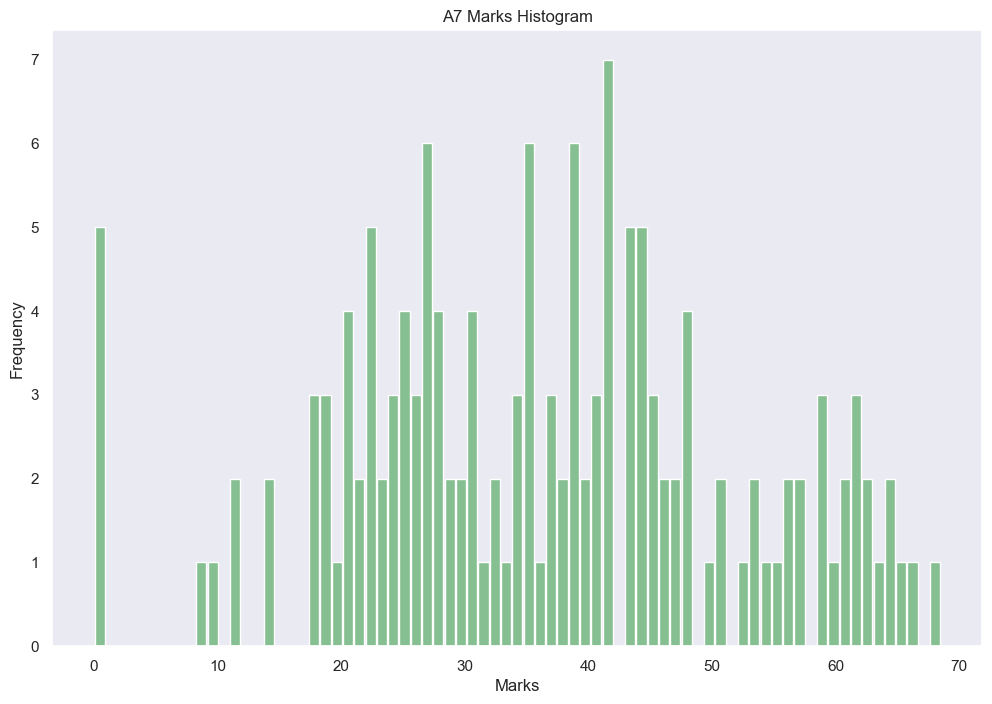

In [11]:
a7_df.hist(column='Marks',bins=max_marks, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
# label x and y axes
plt.xlabel('Marks')
plt.ylabel('Frequency')
# set title
plt.title('A7 Marks Histogram')

In [12]:
for i in range(40, 75):
    print(f"marks: {i} -> {stats.percentileofscore(a7_df['Marks'], i, kind='weak')}")

marks: 40 -> 58.90410958904109
marks: 41 -> 60.958904109589035
marks: 42 -> 65.75342465753424
marks: 43 -> 68.4931506849315
marks: 44 -> 71.91780821917808
marks: 45 -> 73.2876712328767
marks: 46 -> 76.02739726027397
marks: 47 -> 77.39726027397259
marks: 48 -> 80.13698630136986
marks: 49 -> 80.13698630136986
marks: 50 -> 80.82191780821917
marks: 51 -> 82.1917808219178
marks: 52 -> 82.1917808219178
marks: 53 -> 83.56164383561644
marks: 54 -> 84.93150684931507
marks: 55 -> 85.61643835616438
marks: 56 -> 86.30136986301369
marks: 57 -> 88.35616438356163
marks: 58 -> 88.35616438356163
marks: 59 -> 90.41095890410958
marks: 60 -> 91.0958904109589
marks: 61 -> 92.46575342465754
marks: 62 -> 94.52054794520548
marks: 63 -> 95.8904109589041
marks: 64 -> 96.57534246575342
marks: 65 -> 98.63013698630137
marks: 66 -> 99.31506849315068
marks: 67 -> 99.31506849315068
marks: 68 -> 99.31506849315068
marks: 69 -> 100.0
marks: 70 -> 100.0
marks: 71 -> 100.0
marks: 72 -> 100.0
marks: 73 -> 100.0
marks: 74 -

In [13]:
print(a7_df['Marks'].mean())
print(a7_df['Marks'].median())

36.25684931506849
36.5


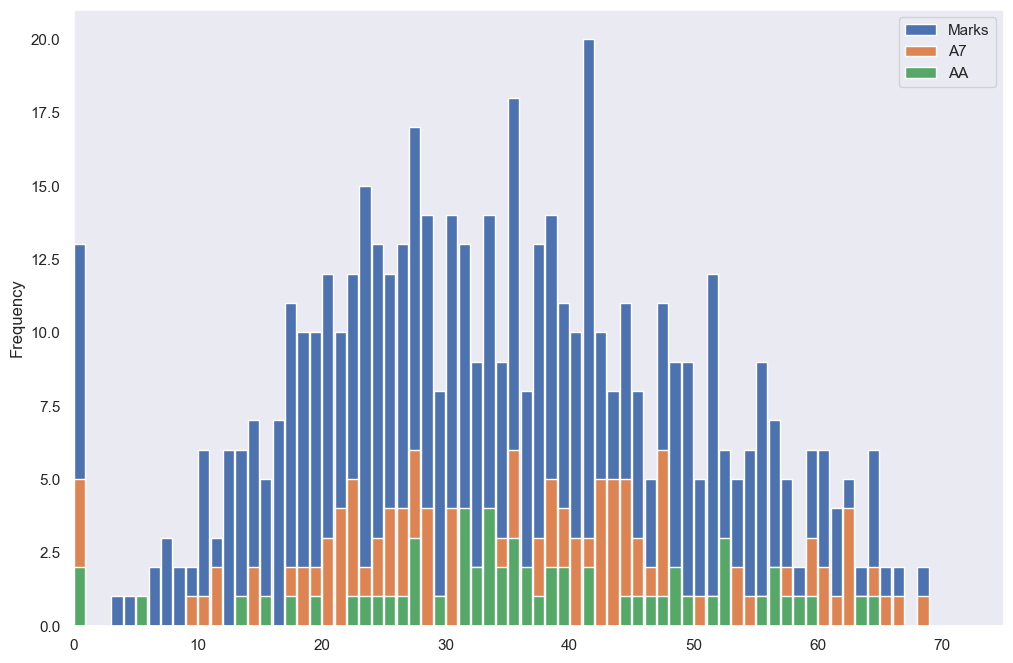

In [14]:
fig, ax = plt.subplots(figsize = (6,4))
df['Marks'].plot(kind = "hist", bins=max_marks, range=[0,max_marks], grid=False, figsize=(12,8), zorder=2, rwidth=0.9)
a7_df['Marks'].plot(kind = "hist", bins=max_marks, range=[0,max_marks], grid=False, figsize=(12,8), zorder=2, rwidth=0.9, label='A7')
df[df['code'] == 'AA']['Marks'].plot(kind = "hist", bins=max_marks, range=[0,max_marks], grid=False, figsize=(12,8), zorder=2, rwidth=0.9, label='AA')
ax.set_xlim(0, max_marks)
plt.legend()
plt.show()

<Axes: >

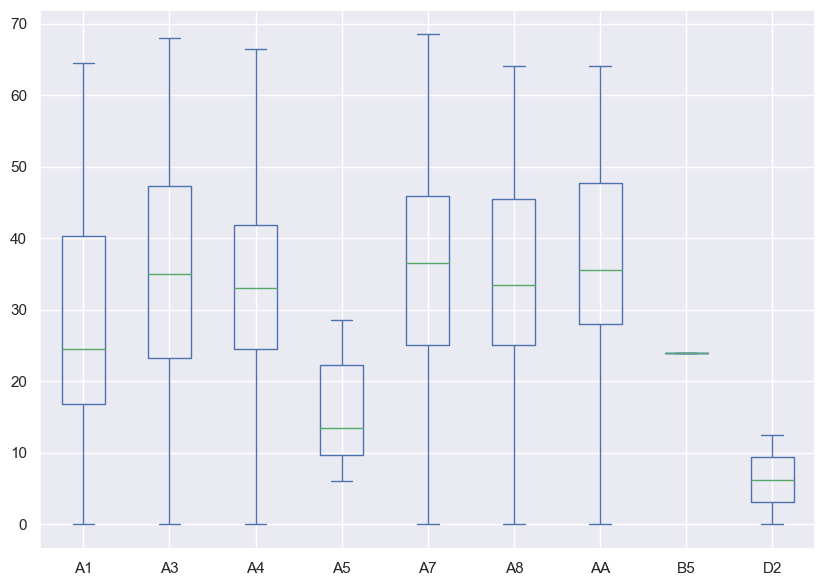

In [17]:
pivot = df.pivot_table(index="ID No", columns='code', values='Marks')
pivot.plot(kind='box', figsize=(10, 7))

<Axes: xlabel='code', ylabel='Marks'>

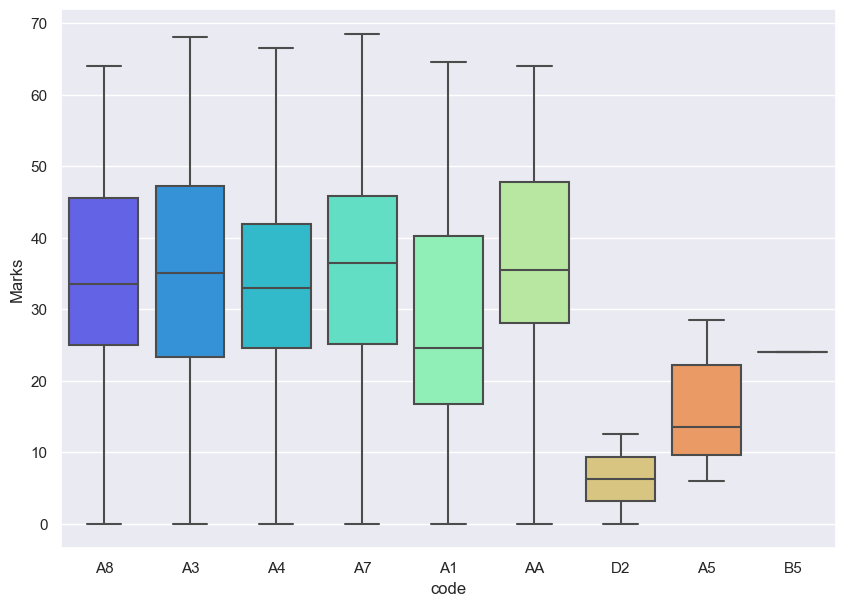

In [31]:
fig, ax = plt.subplots(figsize = (10, 7))

sns.boxplot(x="code", y="Marks", data=df, ax=ax, palette="rainbow")

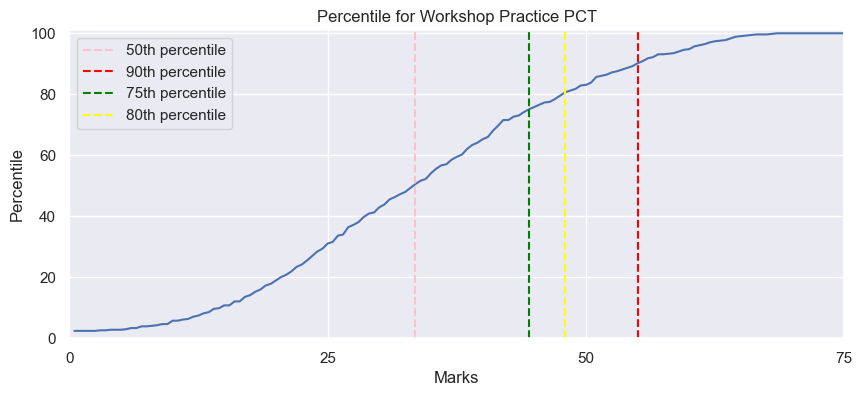

In [28]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (10,4))
fun = lambda k: [i/k for i in list(range(1, max_marks*k + 1))]

a = fun(2)
b = [stats.percentileofscore(df["Marks"],i, kind='weak') for i in a]
ax.plot(a, b)

lis = [i for i in range(0, 101)]

plt.axvline(x=df['Marks'].quantile([0.5]).values[0], color='pink', linestyle='--', label='50th percentile')
plt.axvline(x=df['Marks'].quantile([0.9]).values[0], color='red', linestyle='--', label='90th percentile')
plt.axvline(x=df['Marks'].quantile([0.75]).values[0], color='green', linestyle='--', label='75th percentile')
plt.axvline(x=df['Marks'].quantile([0.8]).values[0], color='yellow', linestyle='--', label='80th percentile')



ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.set_ylim(0,101)
ax.set_xlim(0,max_marks)
ax.set_xlabel("Marks")
ax.set_ylabel("Percentile")
ax.legend()
plt.title('Percentile for Workshop Practice PCT')
plt.show()